## Capstone #2: Public Transportation Transjakarta Analysis
# Introduction
This dataset contains transaction records from a public transport service, detailing customer interactions
<br>
 and trip information. Each record is uniquely identified by a transaction ID (transID) and includes
<br>
 various attributes related to customer profiles, trip details, and payment information.

Key Attributes:
 - transID: A unique identifier for every transaction, ensuring traceability of each record.

 - payCardID: The primary identifier for customers, corresponding to the payment card used for ticketing during entrance and exit.

 - payCardBank: The name of the bank that issued the customer's payment card.

 - payCardName: The name of the customer as printed on the payment card.

 - payCardSex: The gender of the customer as indicated on the payment card.

 - payCardBirthDate: The birth year of the customer, used for age analysis.

 - corridorID: A unique identifier for the route, facilitating grouping and analysis of trips.

 - corridorName: Describes the route, including the starting and finishing points of the journey.

 - direction: Indicates the direction of the trip, with 0 for outbound (Go) and 1 for inbound (Back).

 - tapInStops: The ID of the stop where the customer taps in (enters the transport system).

 - tapInStopsName: The name of the tap-in stop, providing context to the entry point.

 - tapInStopsLat and tapInStopsLon: The latitude and longitude of the tap-in stop, respectively, useful for geospatial analysis.

 - stopStartSeq: The sequence of stops along the route, indicating the order of stops related to the direction of travel.

 - tapInTime: The date and time of the tap-in, critical for trip duration calculations and time-based analyses.

 - tapOutStops: The ID of the stop where the customer taps out (exits the transport system).

 - tapOutStopsName: The name of the tap-out stop, providing context to the exit point.

 - tapOutStopsLat and tapOutStopsLon: The latitude and longitude of the tap-out stop, useful for geospatial analysis.

 - stopEndSeq: The sequence of stops at the exit, indicating the order of stops related to the direction of travel.

 - tapOutTime: The date and time of the tap-out, essential for calculating trip duration.

 - payAmount: The amount paid by the customer for the trip, with some transactions recorded as free.

In [173]:
# Import usual libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [174]:
# Access dataset

filepath = r'C:\Users\Asus\Desktop\DS Purwa\Module_2\Capstone Module 2\Transjakarta.csv'
df_raw = pd.read_csv(filepath)
df = df_raw.copy()
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [175]:
# Data identification

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [176]:
# Checking missing values in the dataset

df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [177]:
# Perform descriptive statistics

df.describe(include='all')

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
count,37900,3.790000e+04,37900,37900,37900,37900.000000,36643,35970,37900.000000,36687,...,37900.000000,37900.000000,37900,35611,36556,36556.000000,36556.000000,36556.000000,36556,36893.000000
unique,37900,NaN,6,1993,2,NaN,221,216,NaN,2570,...,NaN,NaN,37079,2230,2248,NaN,NaN,NaN,35908,NaN
top,EIIW227B8L34VB,NaN,dki,Fathonah Saefullah,F,NaN,1T,Cibubur - Balai Kota,NaN,P00170,...,NaN,NaN,2023-04-25 06:23:00,P00016,BKN,NaN,NaN,NaN,2023-04-10 19:10:15,NaN
freq,1,NaN,18743,80,20157,NaN,400,391,NaN,236,...,NaN,NaN,3,306,316,NaN,NaN,NaN,3,NaN
mean,NaN,4.250060e+17,NaN,NaN,NaN,1990.089314,NaN,NaN,0.500633,NaN,...,106.841554,13.572480,NaN,NaN,NaN,-6.214651,106.841233,21.219909,NaN,2699.712683
std,NaN,1.321699e+18,NaN,NaN,NaN,13.051482,NaN,NaN,0.500006,NaN,...,0.060369,12.237623,NaN,NaN,NaN,0.059022,0.060999,13.800689,NaN,4212.225592
min,NaN,6.040368e+10,NaN,NaN,NaN,1946.000000,NaN,NaN,0.000000,NaN,...,106.614730,0.000000,NaN,NaN,NaN,-6.394973,106.614730,1.000000,NaN,0.000000
25%,NaN,1.800442e+14,NaN,NaN,NaN,1982.000000,NaN,NaN,0.000000,NaN,...,106.803470,4.000000,NaN,NaN,NaN,-6.247225,106.801750,11.000000,NaN,0.000000
50%,NaN,3.507947e+15,NaN,NaN,NaN,1990.000000,NaN,NaN,1.000000,NaN,...,106.834830,10.000000,NaN,NaN,NaN,-6.214718,106.834580,18.000000,NaN,3500.000000
75%,NaN,4.699023e+15,NaN,NaN,NaN,2001.000000,NaN,NaN,1.000000,NaN,...,106.882270,19.000000,NaN,NaN,NaN,-6.174736,106.883030,29.000000,NaN,3500.000000


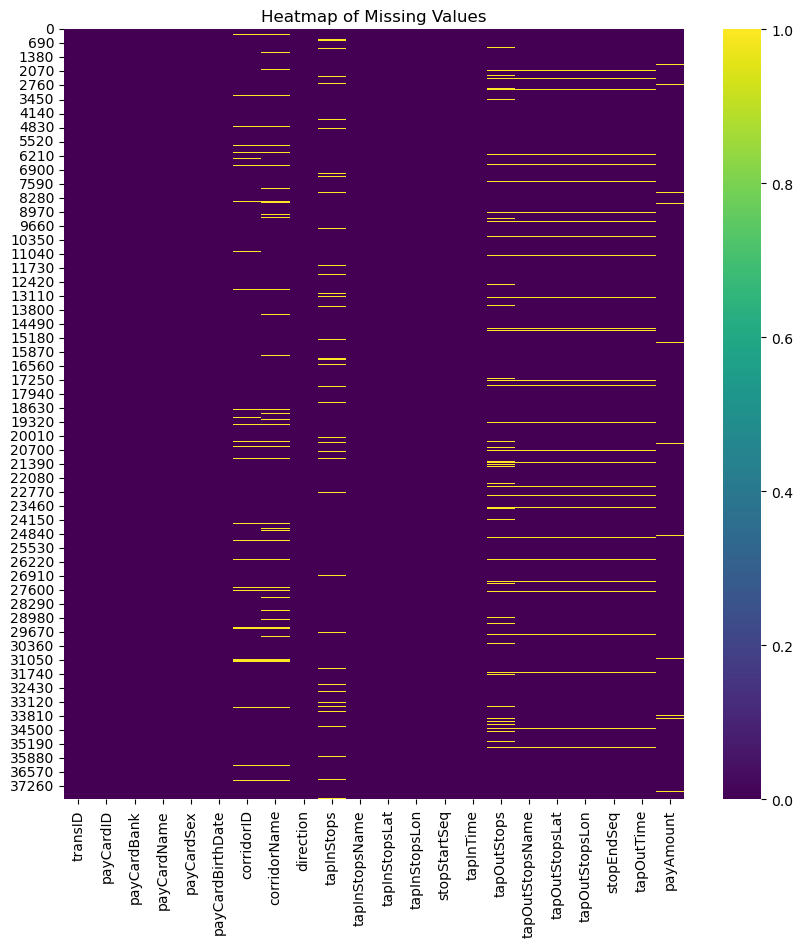

In [178]:
# Visual description of the missing values within the dataset.

column_names = [
    'transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex', 
    'payCardBirthDate', 'corridorID', 'corridorName', 'direction', 
    'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 
    'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName', 
    'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 
    'payAmount'
]

plt.figure(figsize=(10, 10))
sns.heatmap(df[column_names].isna(), cmap='viridis', cbar=True)
plt.title('Heatmap of Missing Values')
plt.show()

In [179]:
# Check duplicate data

df.duplicated().sum()

0

In [180]:
# Check if there are any NaN values in the dataset that disguise as a string 'nan'

NaN_values = len(df[df.isin(['nan']).any(axis=1)])
print(f'there are {NaN_values} nan values')

there are 0 nan values


From the data, we can see that there are columns that has correlation with other columns.
<br>
the columns that has correlate with other column are:
<br>
 - CorridorID
 - CorridorName
 - tapInStops
 - tapInStopsName
 - tapOutStops
 - tapOutStopsName

We can work with these columns by mapping each other and fill accordingly

In [181]:
# Filling corridorID and corridorName
# First, fill the column with 'Unknown'
df['corridorID'].fillna('Unknown', inplace=True)
df['corridorName'].fillna('Unknown', inplace=True)


In [182]:
# Step 1: Select the known corridors
known_corridor = df[(df['corridorID'] != 'Unknown') & (df['corridorName'] != 'Unknown')]

# Step 2: Create mapping dictionaries
id_to_name = known_corridor.set_index('corridorID')['corridorName'].to_dict()
name_to_id = known_corridor.set_index('corridorName')['corridorID'].to_dict()

# Step 3: Fill missing values using mapping dictionaries
df['corridorName'] = df['corridorName'].where(df['corridorName'].notna(), df['corridorID'].map(id_to_name))
df['corridorID'] = df['corridorID'].where(df['corridorID'].notna(), df['corridorName'].map(name_to_id))

# Step 4: Drop Unknown rows
df = df[df['corridorID'] != 'Unknown']
df = df[df['corridorName'] != 'Unknown']


In [183]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops          1144
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2158
tapOutStopsName     1263
tapOutStopsLat      1263
tapOutStopsLon      1263
stopEndSeq          1263
tapOutTime          1263
payAmount            955
dtype: int64

In [184]:
# Same as previous cell
# Filling tapInStops and tapInStopsName
# First, fill the column with 'Unknown'
df['tapInStops'].fillna('Unknown', inplace=True)
df['tapInStopsName'].fillna('Unknown', inplace=True)

In [185]:
# Step 1: Select the known tap in stops
known_tapIn = df[(df['tapInStops'] != 'Unknown') & (df['tapInStopsName'] != 'Unknown')]

# Step 2: Create mapping dictionaries
id_to_name_tapIn = known_corridor.set_index('tapInStops')['tapInStopsName'].to_dict()
tapIn_to_id = known_corridor.set_index('tapInStopsName')['tapInStops'].to_dict()

# Step 3: Fill missing values using mapping dictionaries
df['tapInStopsName']  = df['tapInStopsName'].where(df['tapInStopsName'].notna(), df['tapInStops'].map(id_to_name))
df['tapInStops'] = df['tapInStops'].where(df['tapInStops'].notna(), df['tapInStopsName'].map(name_to_id))

# Step 4: Drop unknown tap in stops
df = df[df['tapInStops'] != 'Unknown']
df = df[df['tapInStopsName'] != 'Unknown']

In [186]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops             0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2099
tapOutStopsName     1228
tapOutStopsLat      1228
tapOutStopsLon      1228
stopEndSeq          1228
tapOutTime          1228
payAmount            922
dtype: int64

In [187]:
df['tapOutStops'].fillna('Unknown', inplace=True)
df['tapOutStopsName'].fillna('Unknown', inplace=True)

In [188]:
# Step 1: Select the known tap out stops
known_tapOut = df[(df['tapOutStops'] != 'Unknown') & (df['tapOutStopsName'] != 'Unknown')]

# Step 2: Create mapping dictionaries
id_to_name_tapOut = known_corridor.set_index('tapOutStops')['tapOutStopsName'].to_dict()
tapOut_to_id = known_corridor.set_index('tapOutStopsName')['tapOutStops'].to_dict()

# Step 3: Fill missing values using mapping dictionaries
df['tapOutStopsName']  = df['tapOutStopsName'].where(df['tapOutStopsName'].notna(), df['tapOutStops'].map(id_to_name))
df['tapOutStops'] = df['tapOutStops'].where(df['tapOutStops'].notna(), df['tapOutStopsName'].map(name_to_id))

# Step 4: Drop the unknown rows
df = df[df['tapOutStops'] != 'Unknown']
df = df[df['tapOutStopsName'] != 'Unknown']

In [189]:
df.isna().sum()

transID               0
payCardID             0
payCardBank           0
payCardName           0
payCardSex            0
payCardBirthDate      0
corridorID            0
corridorName          0
direction             0
tapInStops            0
tapInStopsName        0
tapInStopsLat         0
tapInStopsLon         0
stopStartSeq          0
tapInTime             0
tapOutStops           0
tapOutStopsName       0
tapOutStopsLat        0
tapOutStopsLon        0
stopEndSeq            0
tapOutTime            0
payAmount           865
dtype: int64

Now, we deal with the numeric data that is the column:
<br>
 - payAmount
 - stopEndSeq

In [190]:
# First we need to do statistical analysis on the data to check if the data is normal or not.
# We use the D’Agostino and Pearson’s statistical test for this column.
from scipy.stats import normaltest

pay_amount = df['payAmount'].dropna()
stop_end_seq = df['stopEndSeq'].dropna()

statistic_pay, p_value_pay = normaltest(pay_amount)
print(f"Pay Amount - Statistic: {statistic_pay}, p-value: {p_value_pay}")

statistic_seq, p_value_seq = normaltest(stop_end_seq)
print(f"Stop End Sequence - Statistic: {statistic_seq}, p-value: {p_value_seq}")


Pay Amount - Statistic: 20485.860940132025, p-value: 0.0
Stop End Sequence - Statistic: 2864.9838088829156, p-value: 0.0


From the test result above, we can conclude that the distribution data for both column is not normal.
Therefore, we can fill the missing values with median.

In [191]:
df['payAmount'].fillna(df['payAmount'].median(), inplace=True)
df['stopEndSeq'].fillna(df['stopEndSeq'].median(), inplace=True)

In [192]:
# Change the time columns in the correct format.

df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])


In [193]:
df.isnull().sum()   

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

In [194]:
NaN_values = len(df[df.isin(['nan']).any(axis=1)])
print(f'there are {NaN_values} nan values')

there are 0 nan values


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32595 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           32595 non-null  object        
 1   payCardID         32595 non-null  int64         
 2   payCardBank       32595 non-null  object        
 3   payCardName       32595 non-null  object        
 4   payCardSex        32595 non-null  object        
 5   payCardBirthDate  32595 non-null  int64         
 6   corridorID        32595 non-null  object        
 7   corridorName      32595 non-null  object        
 8   direction         32595 non-null  float64       
 9   tapInStops        32595 non-null  object        
 10  tapInStopsName    32595 non-null  object        
 11  tapInStopsLat     32595 non-null  float64       
 12  tapInStopsLon     32595 non-null  float64       
 13  stopStartSeq      32595 non-null  int64         
 14  tapInTime         3259

In [196]:
# df.to_excel('Capstone_2_cleaned.xlsx')

**Data has been properly cleaned!**
<br>
**Now proceed to EDA**

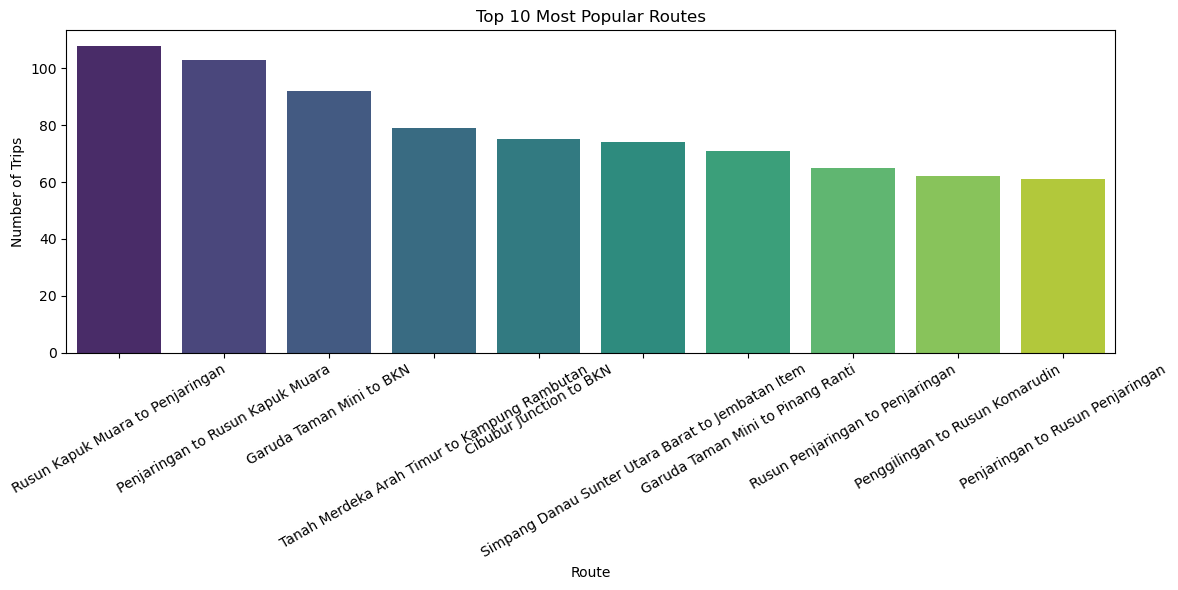

In [197]:
# Group the data by the tap in spot and the tap out spot and count the number of trips for each group.
# Sort the data in descending order and select the top 10 routes.
top_routes = df.groupby(['tapInStopsName', 'tapOutStopsName']).size().sort_values(ascending=False).head(10).reset_index()

# Rename the columns 
top_routes.columns = ['TapInStopsName', 'TapOutStopsName', 'Number of Trips']

# Create new column for route name
top_routes['Route'] = top_routes['TapInStopsName'] + ' to ' + top_routes['TapOutStopsName']

# Plot the top 10 routes
plt.figure(figsize=(12, 6))
sns.barplot(x='Route', y='Number of Trips', data=top_routes, palette='viridis')
plt.title('Top 10 Most Popular Routes')
plt.xlabel('Route')
plt.ylabel('Number of Trips')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


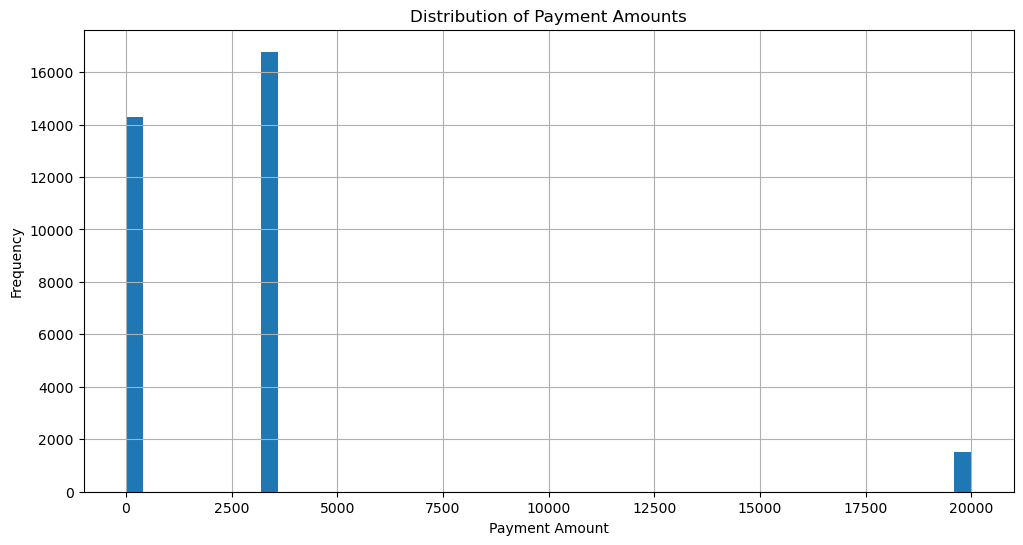

In [198]:
# Payment Amount Distribution Plot
plt.figure(figsize=(12, 6))
df['payAmount'].hist(bins=50)
plt.title('Distribution of Payment Amounts')
plt.xlabel('Payment Amount')
plt.ylabel('Frequency')
plt.show()

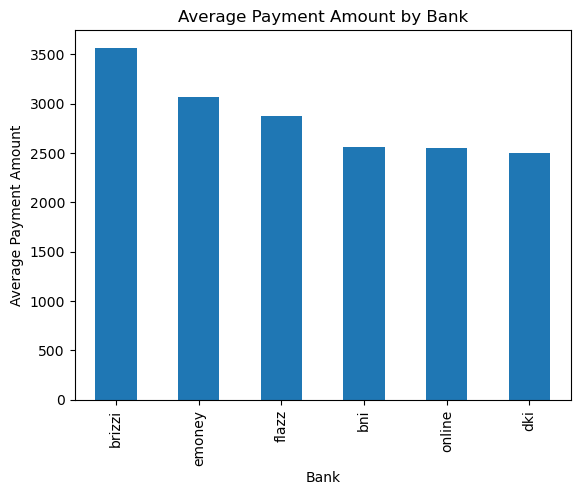

In [199]:
# Group data by the Bank card they use and calculate the average payment amount for each bank.
df.groupby('payCardBank')['payAmount'].mean().sort_values(ascending=False).plot(kind='bar')

#Plot the graph
plt.title('Average Payment Amount by Bank')
plt.xlabel('Bank')
plt.ylabel('Average Payment Amount')
plt.xticks(rotation=90)
plt.show()

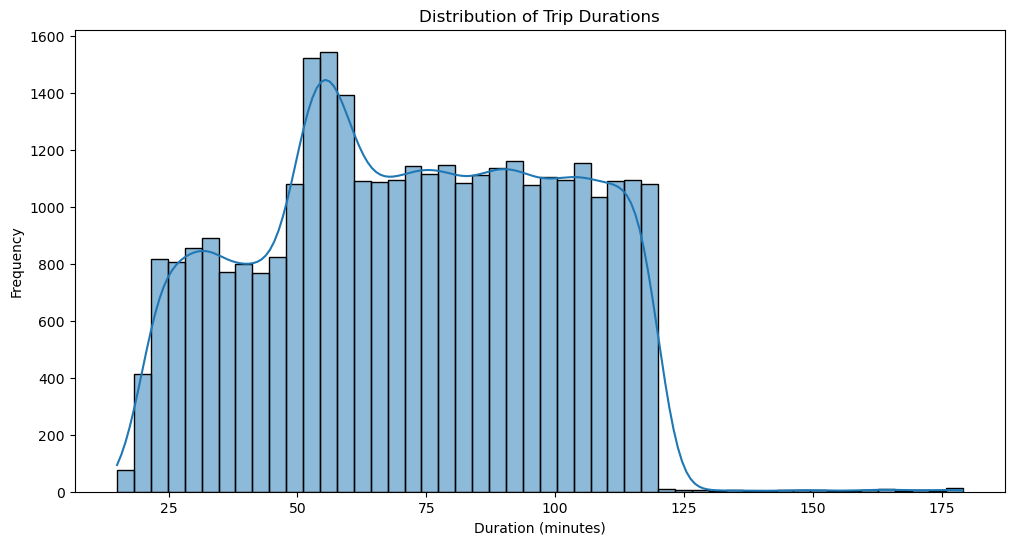

In [200]:
# Calculate trip duration in minutes
df['tripDuration'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

# Trip duration distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['tripDuration'], bins=50, kde=True)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

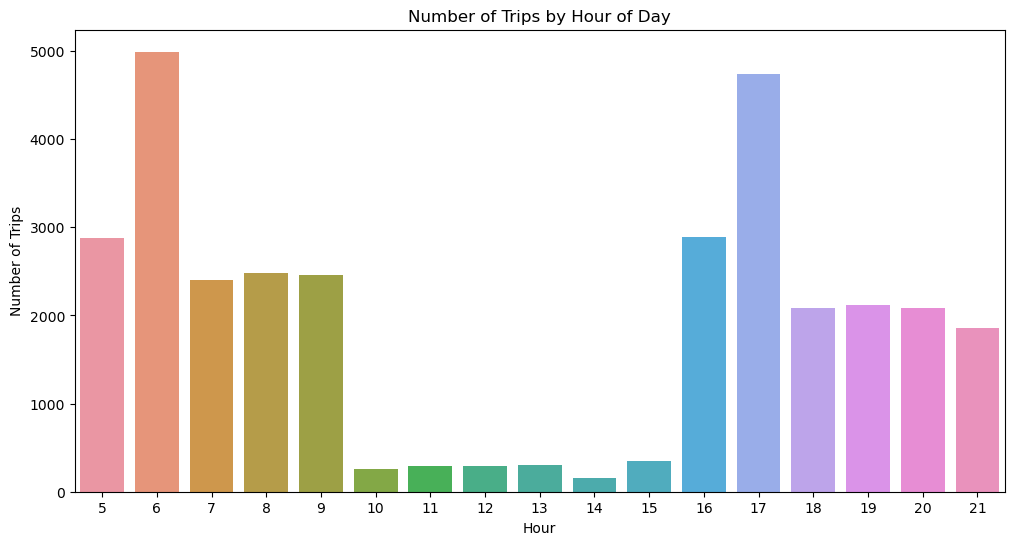

In [201]:
# Trips by hour of day
df['hour'] = df['tapInTime'].dt.hour
hour_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title('Number of Trips by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()

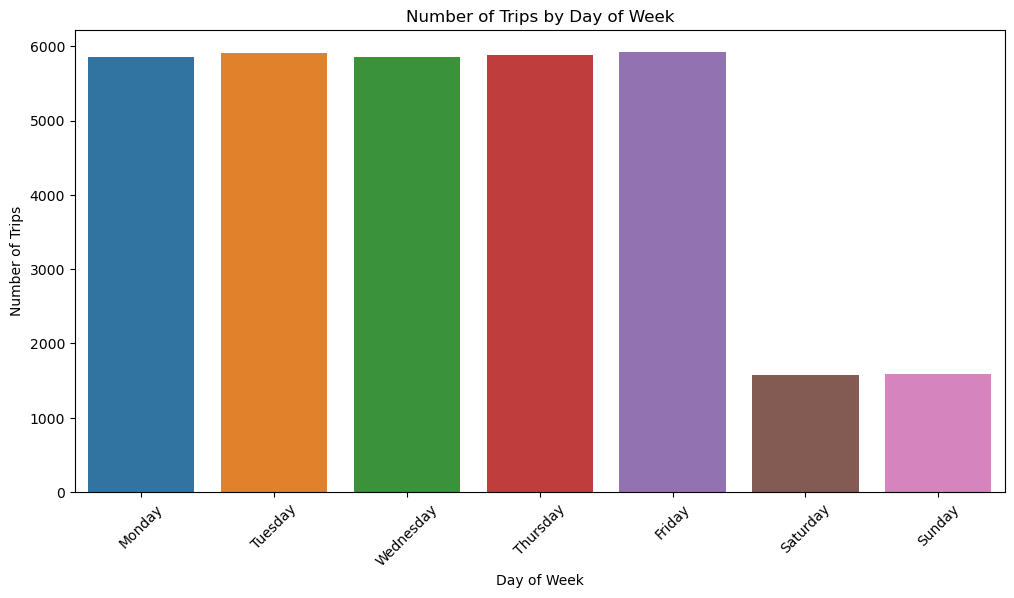

In [202]:
# Trips by day of week
df['day_of_week'] = df['tapInTime'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['day_of_week'].value_counts().reindex(day_order)

# Plot the graph
plt.figure(figsize=(12, 6))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title('Number of Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_736\1756553812.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


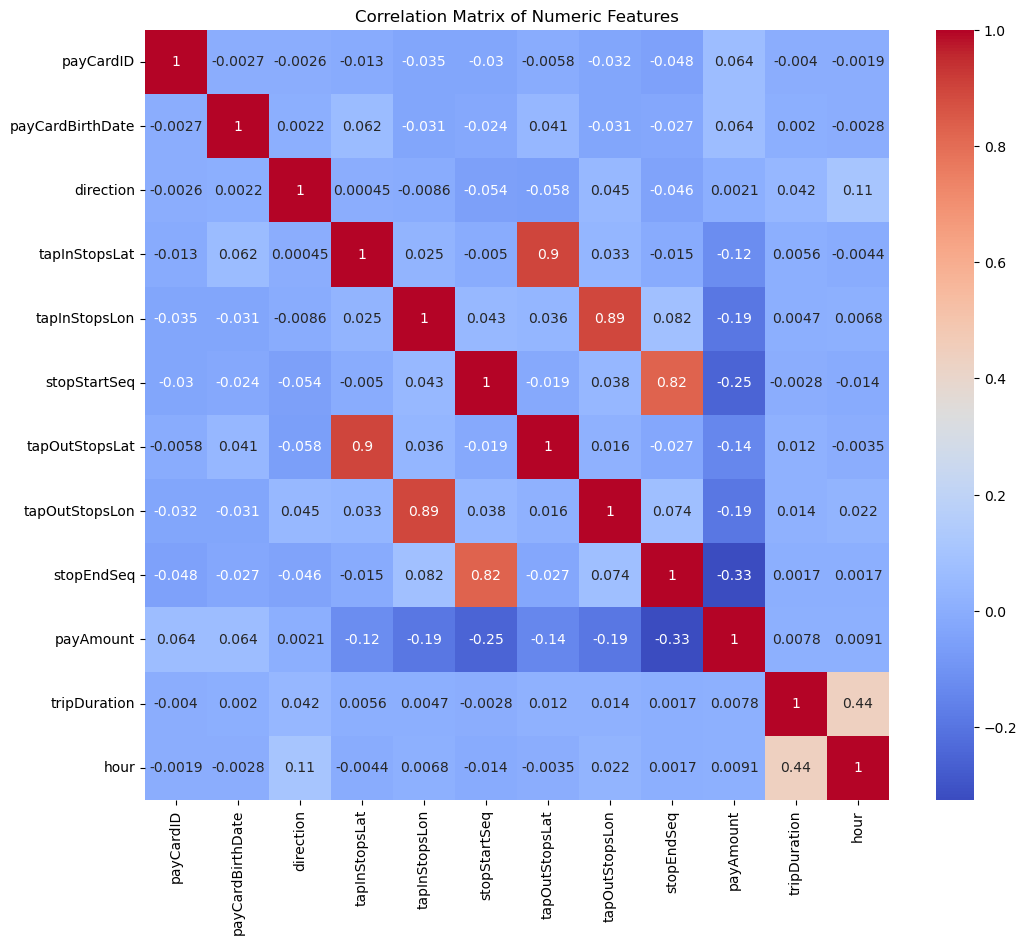

In [203]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

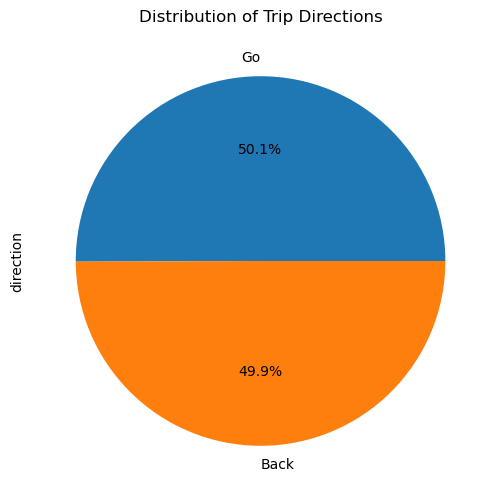

In [204]:
# Trip direction pie chart
plt.figure(figsize=(8, 6))
df['direction'] = df['direction'].map({1.0: 'Go', 0.0: 'Back'})
df['direction'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Trip Directions')
plt.show()

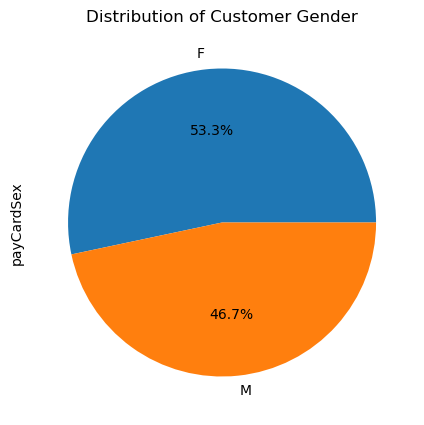

In [205]:
# Gender distribution
plt.figure(figsize=(10, 5))
df['payCardSex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Customer Gender')
plt.show()

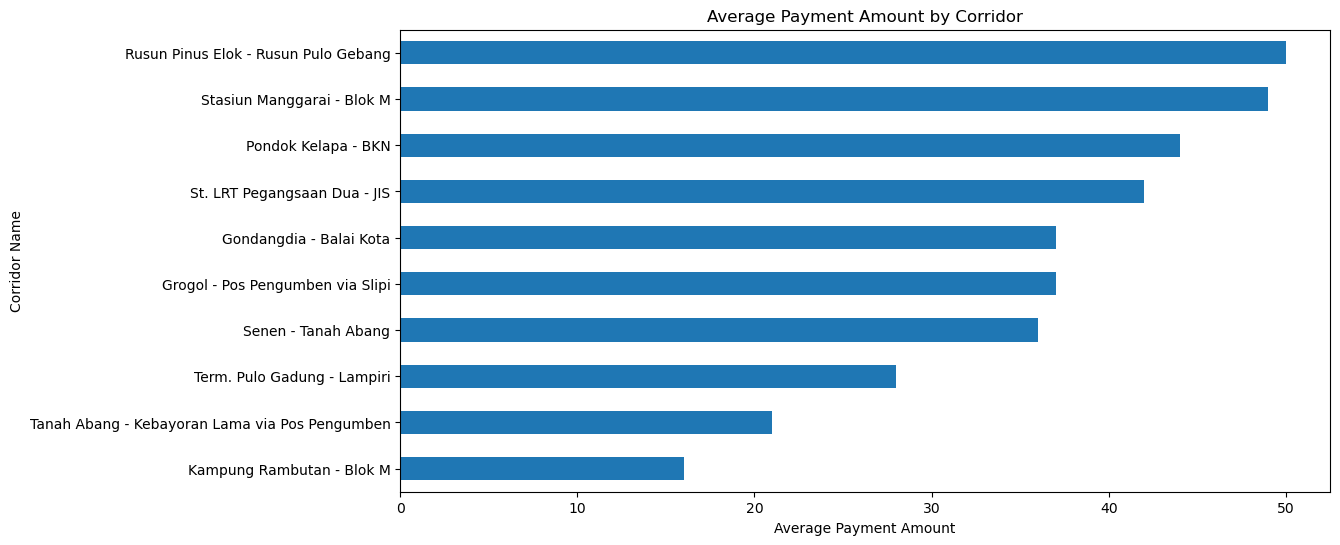

In [206]:
avg_payment_by_corridor = df.groupby('corridorName')['payAmount'].size().sort_values(ascending=True).head(10)
plt.figure(figsize=(12, 6))
avg_payment_by_corridor.plot(kind='barh')
plt.title('Average Payment Amount by Corridor')
plt.xlabel('Average Payment Amount')
plt.ylabel('Corridor Name')
plt.show()

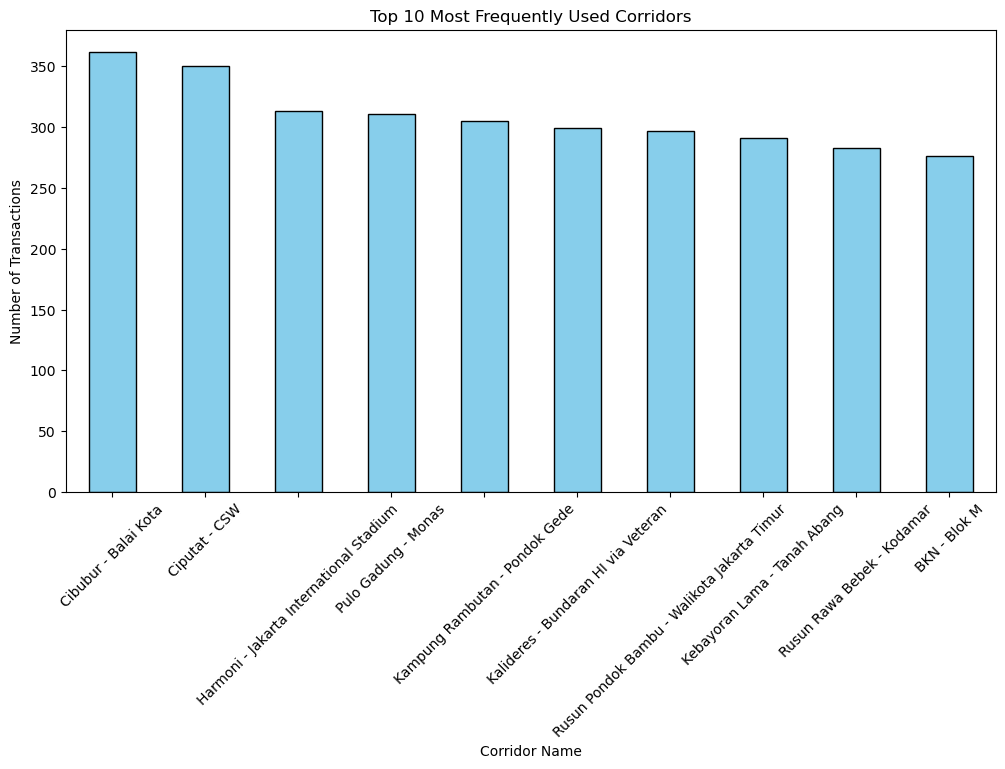

In [207]:
corridor_counts = df['corridorName'].value_counts().head(10)  
plt.figure(figsize=(12, 6))
corridor_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most Frequently Used Corridors')
plt.xlabel('Corridor Name')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


**Question 1: Are certain routes or corridors underutilized or overburdened?**
<br>
<br>
In order to analyse this, we need to see the corridorID and the direction of the corridor.
<br>
Then, we can see the traffic counts.

In [208]:
# Creating corridor_traffic by grouping by corridorID and direction

corridor_traffic = df.groupby(['corridorID', 'direction']).size().unstack(fill_value=0)
corridor_traffic.columns = ['Back', 'Go']

# Establish the threshold of the dataset

mean_go = corridor_traffic['Go'].mean()
mean_back = corridor_traffic['Back'].mean()

print(f"Mean Go: {mean_go}, Mean Back: {mean_back}")

Mean Go: 73.82805429864253, Mean Back: 73.6606334841629


The mean for Go and Back is roughly 74
<br>
For the threshold we can use twice of the mean, which is 148.5

In [209]:
# Threshold
congestion_threshold = 148

# Finding congested corridors with the new threshold
congested_corridors = corridor_traffic[
    (corridor_traffic['Go'] > congestion_threshold) | 
    (corridor_traffic['Back'] > congestion_threshold)
]

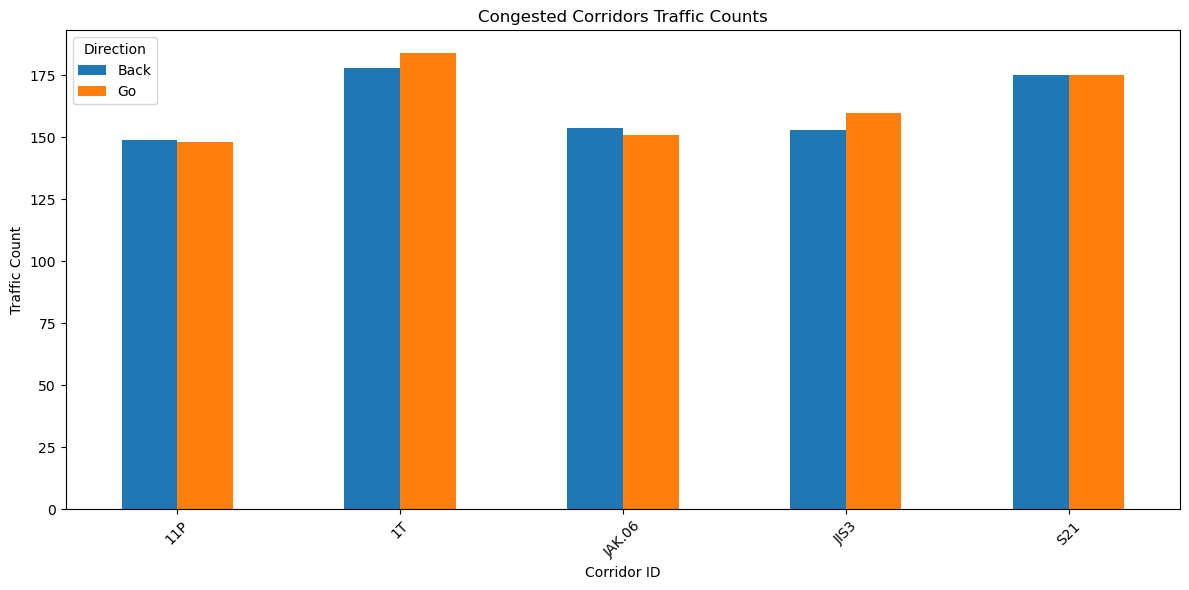

In [210]:
# Plot the congested corridors traffic counts

congested_corridors.plot(kind='bar', figsize=(12, 6))
plt.title('Congested Corridors Traffic Counts')
plt.xlabel('Corridor ID')
plt.ylabel('Traffic Count')
plt.xticks(rotation=45)
plt.legend(title='Direction')
plt.tight_layout()
plt.show()

For the underutilized traffic threshold, we can use just below 73.
<br>
Hence why, the threshold for underutilized traffic is 70

In [211]:
# Underutilized Threshold
underutilized_threshold = 70

# Finding congested corridors with the new threshold
underutilized_corridors = corridor_traffic[
    (corridor_traffic['Go'] < congestion_threshold) | 
    (corridor_traffic['Back'] < congestion_threshold)
]

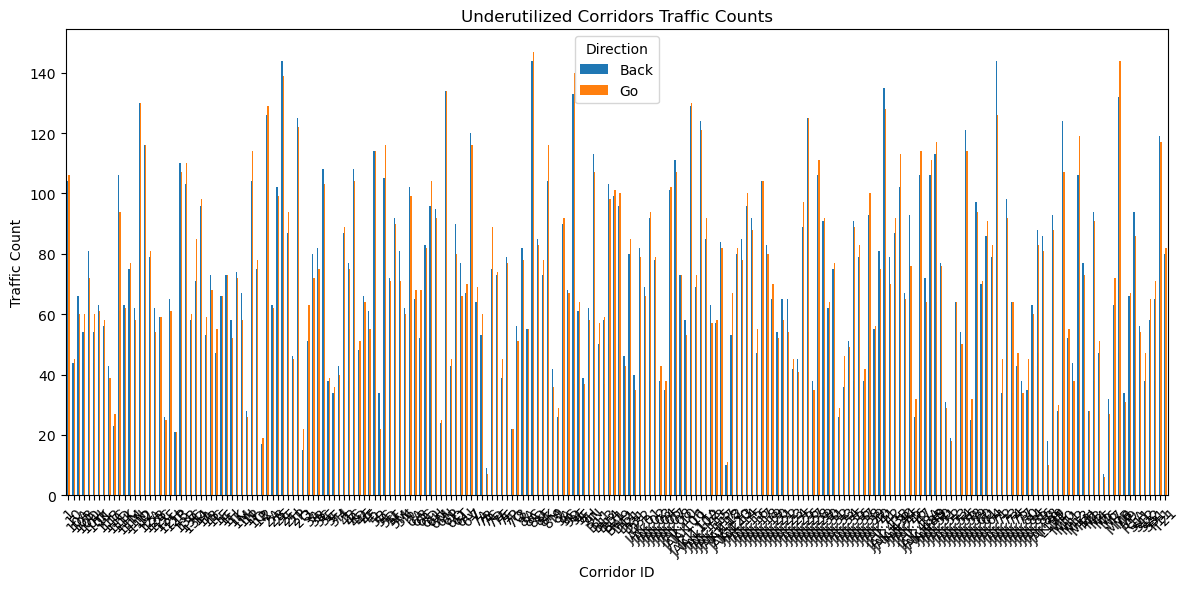

In [216]:
underutilized_corridors.plot(kind='bar', figsize=(12, 6))
plt.title('Underutilized Corridors Traffic Counts')
plt.xlabel('Corridor ID')
plt.ylabel('Traffic Count')
plt.xticks(rotation=45)
plt.legend(title='Direction')
plt.tight_layout()
plt.show()

When examining the two graphs, it is evident that there is a significant disparity between them: 
<br>
the congested corridors are fewer in number compared to the underutilized corridors,
<br>
with the former exhibiting overwhelming traffic levels while the latter reflect minimal activity.

**Question 2:  Do different demographic groups (age, gender) show distinct travel patterns?**
<br>
In order to analyse this, we need age column

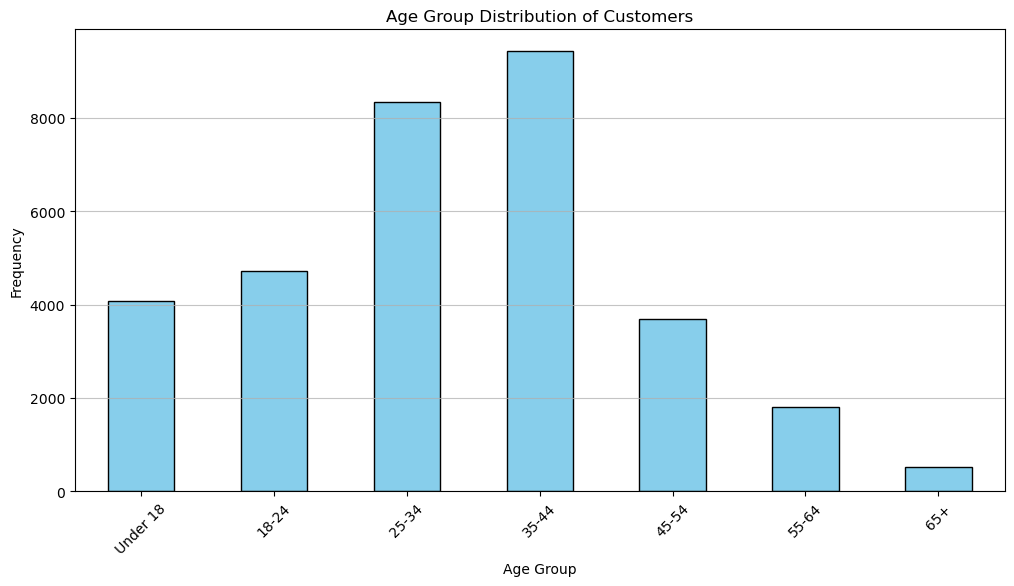

In [215]:
current_year = pd.Timestamp.now().year
df['age'] = current_year - df['payCardBirthDate']

# Define age groups
bins = [0, 17, 24, 34, 44, 54, 64, 100]
labels = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Count the frequency of each age group
age_group_distribution = df['Age Group'].value_counts().sort_index()

# Plot the age group distribution
plt.figure(figsize=(12, 6))
age_group_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Age Group Distribution of Customers')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)  
plt.show()

From the graph above, we can see that the most frequent use of Transjakarta is used by the age group of 35-44
<BR>
Now, we analyze the travel frequency by age and gender.

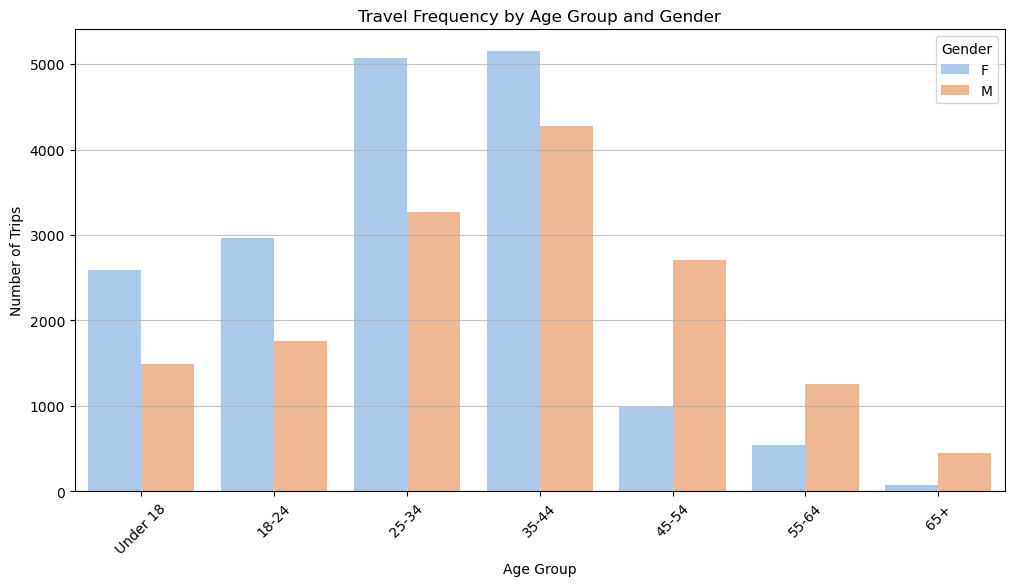

In [217]:
# Create new column that represent travel frequency by age group and gender
travel_frequency = df.groupby(['Age Group', 'payCardSex']).size().reset_index(name='TripCount')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=travel_frequency, x='Age Group', y='TripCount', hue='payCardSex', palette='pastel')
plt.title('Travel Frequency by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Trips')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)  
plt.show()

We can see from the graph above the most frequent user of Transjakarta is Female from the age group of Under 18 until 35-44
<br>
The age group of 45-54 until 65+ shows the most frequent user of Transjakarta is in fact male.

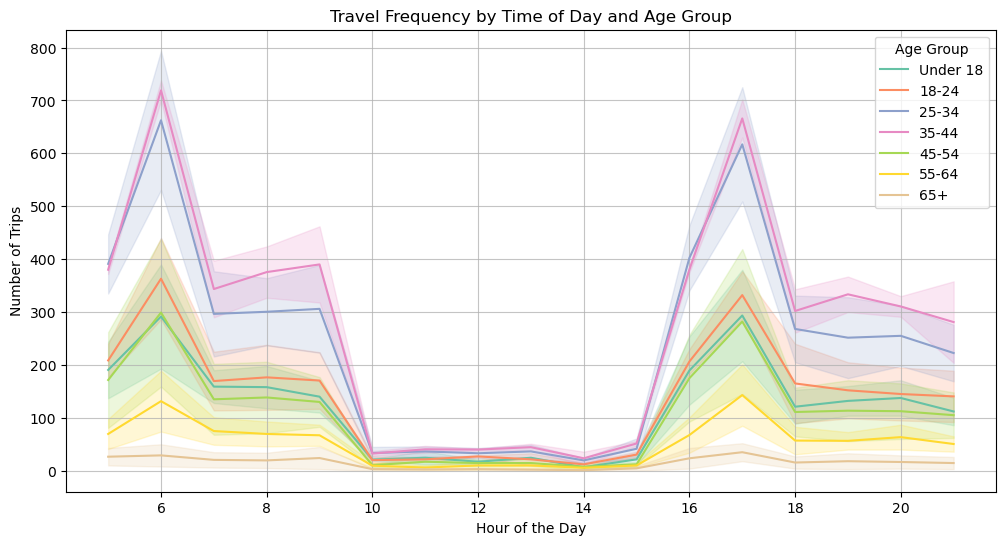

In [221]:
# Create a new column for the hour of the day when the tap-in occurred

df['tapInHour'] = df['tapInTime'].dt.hour

# Time of travel analysis

time_of_travel = df.groupby(['tapInHour', 'Age Group', 'payCardSex']).size().reset_index(name='TripCount')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_of_travel, x='tapInHour', y='TripCount', hue='Age Group', palette='Set2')
plt.title('Travel Frequency by Time of Day and Age Group')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(title='Age Group')
plt.grid(alpha=0.75)
plt.show()

There are 2 peak hours in the data that is 6 AM and 5 PM. The most frequent user is age group of 25-34 and 35-44

**Question 3: Are there specific stops where passengers frequently tap in or out?**
Now we want to see where is the most frequent stop for passengers to tap in or out. 
<br>
We can do this by counting the number of trips that start or end at each stop.
<br>
We can then sort the stops by the number of trips and identify the top 10 most frequent stops.